## Standardize, clean and wrangle Water Quality Portal data in various Gulf of Mexico Estuaries into more analytic-ready formats using the harmonize_wq package. Run one estuary at a time and with less detail than the other demo notebooks.

##### import the required libraries. Check requirements.txt for dependencies that should be installed.

In [1]:
import os
import geopandas
import pandas
from harmonize_wq import harmonize
from harmonize_wq import convert
from harmonize_wq import wrangle
from harmonize_wq import clean
from harmonize_wq import location
from harmonize_wq import visualize
import dataretrieval.wqp as wqp

#### Gulf of Mexico Estuaries

In [2]:
# Read geometry for Area of Interest from local file
# If saving results locally set file names for outputs
out_dir = r'D:\code\harmonize-wq\harmonize_wq\tests\data'  # UPDATE ONCE WITH TEMP DIRECTORY
aoi_dir = os.path.join(out_dir, r'NCCA_dissolved_GOM.shp')
aoi_gdf_all = wrangle.as_gdf(aoi_dir)

# WGS 1984 for WQP query
aoi_gdf_all = aoi_gdf_all.to_crs(epsg=4326)

<AxesSubplot:>

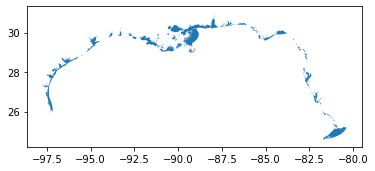

In [3]:
# Plot all the Gulf of Mexico Estuaries
aoi_gdf_all.plot()

#### Work through select estuary

In [4]:
i = 2  #Index for the estuary to retrieve

In [5]:
# Print reformated estuary name
estuary_name = aoi_gdf_all.iloc[i]['EDACDA_NM']
out_est_name = 'Estuary_' + str(estuary_name).replace(" ", "_")
out_est_name = out_est_name.replace(".", "")
out_est_name = out_est_name.replace("(", "")
out_est_name = out_est_name.replace(")", "")
print('Estuary Name: "{}" -> "{}"'.format(estuary_name, out_est_name))

Estuary Name: "_CDA_G056 (Sarasota" -> "Estuary__CDA_G056_Sarasota"


In [6]:
# Get polygon from polygons
aoi_gdf = aoi_gdf_all.loc[[i],'geometry']

<AxesSubplot:>

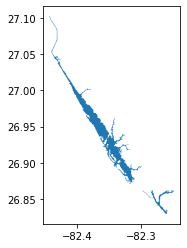

In [7]:
# Map selection
aoi_gdf.plot()

#### Build Query

In [8]:
# Each estuary may be multi-polygon, so the query will be built around the full extent instead of one row
bBox = ','.join(map(str, aoi_gdf.total_bounds))  # get bBox string for total extent of multipolygon

In [9]:
# Build query
query = {'characteristicName': ['Phosphorus',
                                'Temperature, water',
                                'Depth, Secchi disk depth',
                                'Dissolved oxygen (DO)',
                                'Salinity',
                                'pH',
                                'Nitrogen',
                                'Conductivity',
                                'Organic carbon',
                                'Chlorophyll a',
                                'Turbidity',
                                'Sediment',
                                'Fecal Coliform',
                                'Escherichia coli']}
query['bBox'] = bBox

In [10]:
# Query stations and harmonize
stations, site_md = wqp.what_sites(**query)
stations_gdf = location.harmonize_locations(stations)

In [11]:
# Clip with geopandas because it is a geoseries instead of a geodataframe
stations_clipped = geopandas.clip(stations_gdf, aoi_gdf)

In [12]:
# Save it
out_geo = os.path.join(out_dir, out_est_name + ".shp")
#stations_clipped.to_file(out_geo)

<AxesSubplot:>

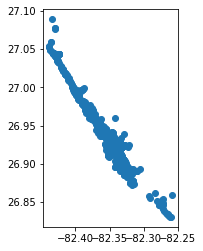

In [13]:
# Map it
stations_clipped.plot()

#### Harmonize characteristic data (all at once)

In [14]:
# Query results
query['dataProfile'] = 'narrowResult'
res_narrow, md_narrow = wqp.get_results(**query)

D:\Python\env\arcgispro-py3-spy-harmonize-wq\lib\site-packages\ipykernel_launcher.py:3: DtypeWarning: Columns (9,10,13,19,20,22,60,61,64,65,71,73) have mixed types.Specify dtype option on import or set low_memory=False.
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
# Look at query results
df = res_narrow
df

,OrganizationIdentifier,OrganizationFormalName,ActivityIdentifier,ActivityStartDate,ActivityStartTime/Time,ActivityStartTime/TimeZoneCode,MonitoringLocationIdentifier,ResultIdentifier,DataLoggerLine,ResultDetectionConditionText,...,AnalysisEndTime/TimeZoneCode,ResultLaboratoryCommentCode,ResultLaboratoryCommentText,ResultDetectionQuantitationLimitUrl,LaboratoryAccreditationIndicator,LaboratoryAccreditationAuthorityName,TaxonomistAccreditationIndicator,TaxonomistAccreditationAuthorityName,LabSamplePreparationUrl,ProviderName
0,21FLSARA_WQX,Sarasota County Environmental Services,21FLSARA_WQX-S1312LB213F-128039,2013-12-03,10:50:00,EST,21FLSARA_WQX-LB-2-12,STORET-770126858,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET
1,21FLSARA_WQX,Sarasota County Environmental Services,21FLSARA_WQX-13120310352S,2013-12-03,10:01:00,EST,21FLSARA_WQX-LB-3-12,STORET-528347606,NaN,NaN,...,NaN,NaN,NaN,https://www.waterqualitydata.us/data/providers...,NaN,NaN,NaN,NaN,NaN,STORET
2,21FLSARA_WQX,Sarasota County Environmental Services,21FLSARA_WQX-55361,2013-02-27,10:01:00,EST,21FLSARA_WQX-WOD-2,STORET-528324771,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET
3,21FLCHAR_WQX,FDEP Charlotte Harbor Aquatic/Buffer Preserves,21FLCHAR_WQX-1487272F1-22480,2013-03-04,06:45:00,EST,21FLCHAR_WQX-LBGOT2,STORET-746345829,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET
4,21FLSWFD_WQX,Southwest Florida Water Management District,21FLSWFD_WQX-718131309,2013-07-18,13:09:00,EDT,21FLSWFD_WQX-735505,STORET-531297498,NaN,NaN,...,NaN,NaN,NaN,https://www.waterqualitydata.us/data/providers...,NaN,NaN,NaN,NaN,NaN,STORET
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218951,21FLCHAR_WQX,FDEP Charlotte Harbor Aquatic/Buffer Preserves,21FLCHAR_WQX-LBV001B-01/03/22-FP1,2022-01-03,08:31:00,EST,21FLCHAR_WQX-LBV001B,STORET-930057570,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET
218952,21FLCHAR_WQX,FDEP Charlotte Harbor Aquatic/Buffer Preserves,21FLCHAR_WQX-LBV003-01/03/22-FP1,2022-01-03,07:35:00,EST,21FLCHAR_WQX-LBV003,STORET-930057524,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET
218953,21FLCHAR_WQX,FDEP Charlotte Harbor Aquatic/Buffer Preserves,21FLCHAR_WQX-LBV006-01/03/22-FP1,2022-01-03,07:40:00,EST,21FLCHAR_WQX-LBV006,STORET-930066292,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET
218954,21FLCHAR_WQX,FDEP Charlotte Harbor Aquatic/Buffer Preserves,21FLCHAR_WQX-GSV005B-01/03/22-FP1,2022-01-03,07:40:00,EST,21FLCHAR_WQX-GSV005B,STORET-930061022,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET


In [16]:
# Save it
out_df = os.path.join(out_dir, out_est_name + ".csv")
#df.to_csv(out_df,index=False)

The harmonize_all() function identifies the characteristics present and uses preset defaults to harmonize each. This function does not has as much flexibility e.g., to keep intermediate columns, produce reports, or convert to non-default units.

In [17]:
# Harmonize all
# Note that errors='skip' or 'ignore' will be needed to supress errors in dimensionality in some cases
# such errors occur when a unit can not be converted to the desired unit (e.g., degC to m)
df = harmonize.harmonize_all(df, errors='ignore')
df

D:\Python\env\arcgispro-py3-spy-harmonize-wq\lib\site-packages\pandas\core\dtypes\cast.py:1990: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  result[:] = values
D:\code\harmonize-wq\harmonize_wq\harmonize.py:155: UserWarning: WARNING: 'ppm' UNDEFINED UNIT for Phosphorus
  warn("WARNING: " + problem)
D:\code\harmonize-wq\harmonize_wq\harmonize.py:433: UserWarning: Warning: "Suspended_Phosphorus" column for Suspended, may be error
  warn('Warning: ' + prob)
D:\code\harmonize-wq\harmonize_wq\harmonize.py:433: UserWarning: Warning: "Filterable_Phosphorus" column for Filterable, may be error
  warn('Warning: ' + prob)
D:\code\harmonize-wq\harmonize_wq\harmonize.py:433: UserWarning: Warning: "Bed_Sediment_Phosphorus" column for Bed Sediment, may be error
  warn('Warning: ' + prob)
D:\code\harmonize-wq\harmonize_wq\harmonize.py:433: UserWarning: Warning: "__Phosphorus" column for  , may be error
  warn('Warning: ' + prob)


,OrganizationIdentifier,OrganizationFormalName,ActivityIdentifier,ActivityStartDate,ActivityStartTime/Time,ActivityStartTime/TimeZoneCode,MonitoringLocationIdentifier,ResultIdentifier,DataLoggerLine,ResultDetectionConditionText,...,TDP_Phosphorus,Other_Phosphorus,Bed_Sediment_Phosphorus,Chlorophyll,Turbidity,Secchi,pH,Sediment,Nitrogen,Salinity
0,21FLSARA_WQX,Sarasota County Environmental Services,21FLSARA_WQX-S1312LB213F-128039,2013-12-03,10:50:00,EST,21FLSARA_WQX-LB-2-12,STORET-770126858,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0 Practical_Salinity_Units
1,21FLSARA_WQX,Sarasota County Environmental Services,21FLSARA_WQX-13120310352S,2013-12-03,10:01:00,EST,21FLSARA_WQX-LB-3-12,STORET-528347606,NaN,NaN,...,NaN,NaN,NaN,NaN,6.9 Nephelometric_Turbidity_Units,NaN,NaN,NaN,NaN,NaN
2,21FLSARA_WQX,Sarasota County Environmental Services,21FLSARA_WQX-55361,2013-02-27,10:01:00,EST,21FLSARA_WQX-WOD-2,STORET-528324771,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.52 Practical_Salinity_Units
3,21FLCHAR_WQX,FDEP Charlotte Harbor Aquatic/Buffer Preserves,21FLCHAR_WQX-1487272F1-22480,2013-03-04,06:45:00,EST,21FLCHAR_WQX-LBGOT2,STORET-746345829,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.7 Practical_Salinity_Units
4,21FLSWFD_WQX,Southwest Florida Water Management District,21FLSWFD_WQX-718131309,2013-07-18,13:09:00,EDT,21FLSWFD_WQX-735505,STORET-531297498,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218951,21FLCHAR_WQX,FDEP Charlotte Harbor Aquatic/Buffer Preserves,21FLCHAR_WQX-LBV001B-01/03/22-FP1,2022-01-03,08:31:00,EST,21FLCHAR_WQX-LBV001B,STORET-930057570,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.9 meter,NaN,NaN,NaN,NaN
218952,21FLCHAR_WQX,FDEP Charlotte Harbor Aquatic/Buffer Preserves,21FLCHAR_WQX-LBV003-01/03/22-FP1,2022-01-03,07:35:00,EST,21FLCHAR_WQX-LBV003,STORET-930057524,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.84 dimensionless,NaN,NaN,NaN
218953,21FLCHAR_WQX,FDEP Charlotte Harbor Aquatic/Buffer Preserves,21FLCHAR_WQX-LBV006-01/03/22-FP1,2022-01-03,07:40:00,EST,21FLCHAR_WQX-LBV006,STORET-930066292,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.3 meter,NaN,NaN,NaN,NaN
218954,21FLCHAR_WQX,FDEP Charlotte Harbor Aquatic/Buffer Preserves,21FLCHAR_WQX-GSV005B-01/03/22-FP1,2022-01-03,07:40:00,EST,21FLCHAR_WQX-GSV005B,STORET-930061022,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.16 dimensionless,NaN,NaN,NaN


In [18]:
# Set standard columns to look through results
cols = ['ResultMeasureValue', 'ResultMeasure/MeasureUnitCode', 'QA_flag']

Note: if there were no results for a given characteristic a result column will not be generated for that characteristic and there will be a keyError when trying to look at results, e.g., 'KeyError: "['Conductivity'] not in index"' if there are no conductivity results

In [19]:
# Secchi
df.loc[df['CharacteristicName']=='Depth, Secchi disk depth', cols + ['Secchi']]

,ResultMeasureValue,ResultMeasure/MeasureUnitCode,QA_flag,Secchi
28,0.7,m,NaN,0.7 meter
30,0.3,m,NaN,0.3 meter
41,1.3,m,NaN,1.3 meter
46,1.2,m,NaN,1.2 meter
48,1.2,m,NaN,1.2 meter
...,...,...,...,...
218937,1,m,NaN,1.0 meter
218939,0.7,m,NaN,0.7 meter
218945,0.5,m,NaN,0.5 meter
218951,0.9,m,NaN,0.9 meter


In [20]:
# Temperature
df.loc[df['CharacteristicName']=='Temperature, water', cols + ['Temperature']]

,ResultMeasureValue,ResultMeasure/MeasureUnitCode,QA_flag,Temperature
6,30.4,deg C,NaN,30.4 degree_Celsius
22,28.02,deg C,NaN,28.02 degree_Celsius
38,28.58,deg C,NaN,28.58 degree_Celsius
47,23.3,deg C,NaN,23.3 degree_Celsius
54,17.7,deg C,NaN,17.7 degree_Celsius
...,...,...,...,...
218925,24.5,deg C,NaN,24.5 degree_Celsius
218932,24.2,deg C,NaN,24.2 degree_Celsius
218934,23.6,deg C,NaN,23.6 degree_Celsius
218940,24,deg C,NaN,24.0 degree_Celsius


In [21]:
# Dissolved Oxygen
df.loc[df['CharacteristicName']=='Dissolved oxygen (DO)', cols + ['DO']]

,ResultMeasureValue,ResultMeasure/MeasureUnitCode,QA_flag,DO
15,13.06,mg/l,NaN,13.06 milligram / liter
23,6.2,mg/l,NaN,6.2 milligram / liter
24,1,mg/l,NaN,1.0 milligram / liter
25,7.4,mg/l,NaN,7.4 milligram / liter
26,1.8,mg/l,NaN,1.8 milligram / liter
...,...,...,...,...
218904,2.41,mg/l,NaN,2.41 milligram / liter
218905,5.8,mg/l,NaN,5.8 milligram / liter
218915,5.11,mg/l,NaN,5.11 milligram / liter
218926,2.3,mg/l,NaN,2.3 milligram / liter


In [22]:
# pH
df.loc[df['CharacteristicName']=='pH', cols + ['pH']]

,ResultMeasureValue,ResultMeasure/MeasureUnitCode,QA_flag,pH
7,7.9,None,NaN,7.9 dimensionless
12,7.9,None,NaN,7.9 dimensionless
13,8.1,None,NaN,8.1 dimensionless
14,7.8,None,NaN,7.8 dimensionless
21,7.3,None,NaN,7.3 dimensionless
...,...,...,...,...
218942,7.56,None,NaN,7.56 dimensionless
218947,7.54,None,NaN,7.54 dimensionless
218950,7.7,None,NaN,7.7 dimensionless
218952,7.84,None,NaN,7.84 dimensionless


In [23]:
# Salinity
df.loc[df['CharacteristicName']=='Salinity', cols + ['Salinity']]

,ResultMeasureValue,ResultMeasure/MeasureUnitCode,QA_flag,Salinity
0,31.0,PSS,NaN,31.0 Practical_Salinity_Units
2,0.52,PSS,NaN,0.52 Practical_Salinity_Units
3,18.7,ppth,NaN,18.7 Practical_Salinity_Units
5,0.28,PSS,NaN,0.28 Practical_Salinity_Units
8,36.2,ppth,NaN,36.2 Practical_Salinity_Units
...,...,...,...,...
218928,35.26,ppth,NaN,35.26 Practical_Salinity_Units
218929,33.14,ppth,NaN,33.14 Practical_Salinity_Units
218931,27.18,ppth,NaN,27.18 Practical_Salinity_Units
218935,29.88,ppth,NaN,29.88 Practical_Salinity_Units


In [24]:
# Nitrogen
df.loc[df['CharacteristicName']=='Nitrogen', cols + ['Nitrogen']]

,ResultMeasureValue,ResultMeasure/MeasureUnitCode,QA_flag,Nitrogen
59054,0.236,mg/l,NaN,0.236 milligram / liter
59202,0.244,mg/l,NaN,0.244 milligram / liter
61052,0.21,mg/l,NaN,0.21 milligram / liter
61156,0.25,mg/l,NaN,0.25 milligram / liter


In [25]:
# Conductivity
if 'Conductivity' in df.columns:
    df.loc[df['CharacteristicName']=='Conductivity', cols + ['Conductivity']]

In [26]:
# Chlorophyll A
df.loc[df['CharacteristicName']=='Chlorophyll a', cols + ['Chlorophyll']]

,ResultMeasureValue,ResultMeasure/MeasureUnitCode,QA_flag,Chlorophyll
31419,3.53,ug/l,NaN,0.0035299999999999997 milligram / liter
31433,2.19,ug/l,NaN,0.00219 milligram / liter
31447,7.26,ug/l,NaN,0.00726 milligram / liter
31461,4.02,ug/l,NaN,0.004019999999999999 milligram / liter
31475,5.3,ug/l,NaN,0.0053 milligram / liter
...,...,...,...,...
217203,NaN,NaN,ResultMeasureValue: missing (NaN) result; Resu...,NaN
217210,33.0,ug/l,NaN,0.033 milligram / liter
217233,0.9,ug/l,NaN,0.0009000000000000001 milligram / liter
217239,NaN,NaN,ResultMeasureValue: missing (NaN) result; Resu...,NaN


In [27]:
# Carbon
df.loc[df['CharacteristicName']=='Organic carbon', cols + ['Carbon']]

,ResultMeasureValue,ResultMeasure/MeasureUnitCode,QA_flag,Carbon
4,5.8,mg/l,NaN,5.8 milligram / liter
51,2.7,mg/l,NaN,2.7 milligram / liter
106,2.7,mg/l,NaN,2.7 milligram / liter
139,22,mg/l,NaN,22.0 milligram / liter
197,2.52,mg/l,NaN,2.52 milligram / liter
...,...,...,...,...
217250,28.0,mg/l,NaN,28.0 milligram / liter
217594,18.0,mg/l,NaN,18.0 milligram / liter
218524,18,mg/l,NaN,18.0 milligram / liter
218526,17,mg/l,NaN,17.0 milligram / liter


In [28]:
# Turbidity
df.loc[df['CharacteristicName']=='Turbidity', cols + ['Turbidity']]

,ResultMeasureValue,ResultMeasure/MeasureUnitCode,QA_flag,Turbidity
1,6.9,NTU,NaN,6.9 Nephelometric_Turbidity_Units
9,1.1,NTU,NaN,1.1 Nephelometric_Turbidity_Units
36,4.4,NTU,NaN,4.4 Nephelometric_Turbidity_Units
52,0.70,NTU,NaN,0.7 Nephelometric_Turbidity_Units
55,1.3,NTU,NaN,1.3 Nephelometric_Turbidity_Units
...,...,...,...,...
218916,2.1,NTU,NaN,2.1 Nephelometric_Turbidity_Units
218921,1.1,NTU,NaN,1.1 Nephelometric_Turbidity_Units
218930,1.7,NTU,NaN,1.7 Nephelometric_Turbidity_Units
218936,3.5,NTU,NaN,3.5 Nephelometric_Turbidity_Units


In [29]:
# Sediment
df.loc[df['CharacteristicName']=='Sediment', cols + ['Sediment']]

,ResultMeasureValue,ResultMeasure/MeasureUnitCode,QA_flag,Sediment
217084,1,%,NaN,10.0 gram / kilogram
217085,11,%,NaN,110.0 gram / kilogram
217086,66,%,NaN,660.0 gram / kilogram
217087,97,%,NaN,970.0 gram / kilogram
217088,100,%,NaN,1000.0 gram / kilogram


In [30]:
# Phosphorus
df.loc[df['TDP_Phosphorus'].notna(), ['ResultMeasureValue', 'ResultMeasure/MeasureUnitCode', 'QA_flag', 'TDP_Phosphorus']]

,ResultMeasureValue,ResultMeasure/MeasureUnitCode,QA_flag,TDP_Phosphorus
215119,0.000,mg/l as P,NaN,0.0 milligram / liter
216871,0.220,mg/l as P,NaN,0.22 milligram / liter
216942,0.160,mg/l as P,NaN,0.16 milligram / liter
216967,0.110,mg/l as P,NaN,0.11 milligram / liter
216995,0.140,mg/l as P,NaN,0.14 milligram / liter
217037,0.190,mg/l as P,NaN,0.19 milligram / liter
217045,0.200,mg/l as P,NaN,0.2 milligram / liter
217059,0.120,mg/l as P,NaN,0.12 milligram / liter
217078,0.170,mg/l as P,NaN,0.17 milligram / liter
217095,0.170,mg/l as P,NaN,0.17 milligram / liter


In [31]:
df.loc[df['TP_Phosphorus'].notna(), ['ResultMeasureValue', 'ResultMeasure/MeasureUnitCode', 'QA_flag', 'TP_Phosphorus']]

,ResultMeasureValue,ResultMeasure/MeasureUnitCode,QA_flag,TP_Phosphorus
10,0.579,mg/l,NaN,0.579 milligram / liter
19,0.008,mg/l,NaN,0.008 milligram / liter
49,0.749,mg/l,NaN,0.749 milligram / liter
67,0.445,mg/l,NaN,0.445 milligram / liter
94,0.422,mg/l,NaN,0.422 milligram / liter
...,...,...,...,...
218933,0.045,mg/l,NaN,0.045 milligram / liter
218938,0.23,mg/l,NaN,0.23 milligram / liter
218943,0.068,mg/l,NaN,0.068 milligram / liter
218948,0.096,mg/l,NaN,0.096 milligram / liter


### Datetime

datetime() formats time using dataretrieval and ActivityStart

In [32]:
# First inspect the existing unformated fields
cols = ['ActivityStartDate', 'ActivityStartTime/Time', 'ActivityStartTime/TimeZoneCode']
df[cols]

,ActivityStartDate,ActivityStartTime/Time,ActivityStartTime/TimeZoneCode
0,2013-12-03,10:50:00,EST
1,2013-12-03,10:01:00,EST
2,2013-02-27,10:01:00,EST
3,2013-03-04,06:45:00,EST
4,2013-07-18,13:09:00,EDT
...,...,...,...
218951,2022-01-03,08:31:00,EST
218952,2022-01-03,07:35:00,EST
218953,2022-01-03,07:40:00,EST
218954,2022-01-03,07:40:00,EST


In [33]:
# Note the input columns are dropped (rename the result to preserve these columns)
df = clean.datetime(df)
df[['StartDate', 'Activity_datetime']]

,StartDate,Activity_datetime
0,2013-12-03,2013-12-03 15:50:00+00:00
1,2013-12-03,2013-12-03 15:01:00+00:00
2,2013-02-27,2013-02-27 15:01:00+00:00
3,2013-03-04,2013-03-04 11:45:00+00:00
4,2013-07-18,2013-07-18 17:09:00+00:00
...,...,...
218951,2022-01-03,2022-01-03 13:31:00+00:00
218952,2022-01-03,2022-01-03 12:35:00+00:00
218953,2022-01-03,2022-01-03 12:40:00+00:00
218954,2022-01-03,2022-01-03 12:40:00+00:00


Activity_datetime combines all three time component columns into UTC. If time is missing this is NaT so a startDate column is used to preserve date only.

### Depth

In [34]:
# Depth of sample (default units='meter')
df = clean.harmonize_depth(df)
#df.loc[df['ResultDepthHeightMeasure/MeasureValue'].dropna(), "Depth"]
df['ResultDepthHeightMeasure/MeasureValue'].dropna()

Series([], Name: ResultDepthHeightMeasure/MeasureValue, dtype: float64)

Note: Data are often lacking sample depth metadata

### Characteristic to Column (long to wide format)

In [35]:
# Split single QA column into multiple by characteristic (rename the result to preserve these QA_flags)
df2 = wrangle.split_col(df)
df2

,OrganizationIdentifier,OrganizationFormalName,ActivityIdentifier,MonitoringLocationIdentifier,ResultIdentifier,DataLoggerLine,ResultDetectionConditionText,MethodSpecificationName,CharacteristicName,ResultSampleFractionText,...,QA_TDP_Phosphorus,QA_Other_Phosphorus,QA_Bed_Sediment_Phosphorus,QA_Chlorophyll,QA_Turbidity,QA_Secchi,QA_pH,QA_Sediment,QA_Nitrogen,QA_Salinity
0,21FLSARA_WQX,Sarasota County Environmental Services,21FLSARA_WQX-S1312LB213F-128039,21FLSARA_WQX-LB-2-12,STORET-770126858,NaN,NaN,NaN,Salinity,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,21FLSARA_WQX,Sarasota County Environmental Services,21FLSARA_WQX-13120310352S,21FLSARA_WQX-LB-3-12,STORET-528347606,NaN,NaN,NaN,Turbidity,Total,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21FLSARA_WQX,Sarasota County Environmental Services,21FLSARA_WQX-55361,21FLSARA_WQX-WOD-2,STORET-528324771,NaN,NaN,NaN,Salinity,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21FLCHAR_WQX,FDEP Charlotte Harbor Aquatic/Buffer Preserves,21FLCHAR_WQX-1487272F1-22480,21FLCHAR_WQX-LBGOT2,STORET-746345829,NaN,NaN,NaN,Salinity,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21FLSWFD_WQX,Southwest Florida Water Management District,21FLSWFD_WQX-718131309,21FLSWFD_WQX-735505,STORET-531297498,NaN,NaN,NaN,Organic carbon,Total,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218951,21FLCHAR_WQX,FDEP Charlotte Harbor Aquatic/Buffer Preserves,21FLCHAR_WQX-LBV001B-01/03/22-FP1,21FLCHAR_WQX-LBV001B,STORET-930057570,NaN,NaN,NaN,"Depth, Secchi disk depth",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
218952,21FLCHAR_WQX,FDEP Charlotte Harbor Aquatic/Buffer Preserves,21FLCHAR_WQX-LBV003-01/03/22-FP1,21FLCHAR_WQX-LBV003,STORET-930057524,NaN,NaN,NaN,pH,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
218953,21FLCHAR_WQX,FDEP Charlotte Harbor Aquatic/Buffer Preserves,21FLCHAR_WQX-LBV006-01/03/22-FP1,21FLCHAR_WQX-LBV006,STORET-930066292,NaN,NaN,NaN,"Depth, Secchi disk depth",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
218954,21FLCHAR_WQX,FDEP Charlotte Harbor Aquatic/Buffer Preserves,21FLCHAR_WQX-GSV005B-01/03/22-FP1,21FLCHAR_WQX-GSV005B,STORET-930061022,NaN,NaN,NaN,pH,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# This expands the single col (QA_flag) out to a number of new columns based on the unique characteristicNames and speciation
print('{} new columns'.format(len(df2.columns) - len(df.columns)))

15 new columns


In [37]:
# Note: there are fewer rows because NAN results are also dropped in this step
print('{} fewer rows'.format(len(df)-len(df2)))

6066 fewer rows


In [38]:
#Examine Carbon flags from earlier in notebook (note these are empty now because NAN is dropped)
cols = ['ResultMeasureValue', 'ResultMeasure/MeasureUnitCode', 'Carbon', 'QA_Carbon']
df2.loc[df2['QA_Carbon'].notna(), cols]

,ResultMeasureValue,ResultMeasure/MeasureUnitCode,Carbon,QA_Carbon


Next the table is divided into the columns of interest (main_df) and characteristic specific metadata (chars_df)

In [39]:
# split table into main and characteristics tables
main_df, chars_df = wrangle.split_table(df2)

In [40]:
# Columns still in main table
main_df.columns

Index(['OrganizationIdentifier', 'OrganizationFormalName',
       'ActivityIdentifier', 'MonitoringLocationIdentifier', 'ProviderName',
       'Carbon', 'Speciation', 'Temperature', 'Fecal_Coliform', 'DO', 'E_coli',
       'Phosphorus', 'TP_Phosphorus', 'TDP_Phosphorus', 'Other_Phosphorus',
       'Bed_Sediment_Phosphorus', 'Chlorophyll', 'Turbidity', 'Secchi', 'pH',
       'Sediment', 'Nitrogen', 'Salinity', 'StartDate', 'Activity_datetime',
       'Depth', 'QA_Carbon', 'QA_Temperature', 'QA_Fecal_Coliform', 'QA_DO',
       'QA_E_coli', 'QA_TP_Phosphorus', 'QA_TDP_Phosphorus',
       'QA_Other_Phosphorus', 'QA_Bed_Sediment_Phosphorus', 'QA_Chlorophyll',
       'QA_Turbidity', 'QA_Secchi', 'QA_pH', 'QA_Sediment', 'QA_Nitrogen',
       'QA_Salinity'],
      dtype='object')

In [41]:
# look at main table results (first 5)
main_df.head()

,OrganizationIdentifier,OrganizationFormalName,ActivityIdentifier,MonitoringLocationIdentifier,ProviderName,Carbon,Speciation,Temperature,Fecal_Coliform,DO,...,QA_TDP_Phosphorus,QA_Other_Phosphorus,QA_Bed_Sediment_Phosphorus,QA_Chlorophyll,QA_Turbidity,QA_Secchi,QA_pH,QA_Sediment,QA_Nitrogen,QA_Salinity
0,21FLSARA_WQX,Sarasota County Environmental Services,21FLSARA_WQX-S1312LB213F-128039,21FLSARA_WQX-LB-2-12,STORET,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,21FLSARA_WQX,Sarasota County Environmental Services,21FLSARA_WQX-13120310352S,21FLSARA_WQX-LB-3-12,STORET,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21FLSARA_WQX,Sarasota County Environmental Services,21FLSARA_WQX-55361,21FLSARA_WQX-WOD-2,STORET,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21FLCHAR_WQX,FDEP Charlotte Harbor Aquatic/Buffer Preserves,21FLCHAR_WQX-1487272F1-22480,21FLCHAR_WQX-LBGOT2,STORET,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21FLSWFD_WQX,Southwest Florida Water Management District,21FLSWFD_WQX-718131309,21FLSWFD_WQX-735505,STORET,5.8 milligram / liter,Organic carbon,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
# Empty columns that could be dropped (Mostly QA columns)
cols = list(main_df.columns)
x = main_df.dropna(axis=1, how='all')
[col for col in cols if col not in x.columns]

['Depth',
 'QA_Carbon',
 'QA_Temperature',
 'QA_Fecal_Coliform',
 'QA_DO',
 'QA_E_coli',
 'QA_TDP_Phosphorus',
 'QA_Bed_Sediment_Phosphorus',
 'QA_Chlorophyll',
 'QA_Turbidity',
 'QA_Secchi',
 'QA_Sediment',
 'QA_Nitrogen',
 'QA_Salinity']

<AxesSubplot:>

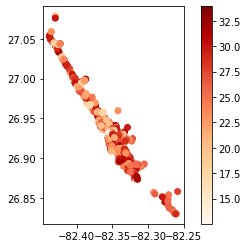

In [43]:
# Map average results at each station
gdf_avg = visualize.map_measure(main_df, stations_clipped, 'Temperature')
gdf_avg.plot(column='mean', cmap='OrRd', legend=True)